In [1]:
import numpy as np
import matplotlib.pyplot as plt

Simulate a stock price path using standard Brownian motion.

$$S_t = s + \sigma W_t $$

$$W_{t_{i+1}} = W_{t_i} + \sqrt{t_{i+1} - t_i} Z_{i+1}$$

In [2]:
s = 100 # starting price
sigma = 2 # volatility
T = 1 # end time
dt = 0.0005 # timestep

t = np.arange(0, T + dt, dt)
Z = np.random.normal(0, 1, len(t) - 1) # iid normal random variables
S = np.zeros(len(t)) # stock prices
S[0] = s

for i in range(1, len(t)):
    S[i] = S[i-1] + sigma * np.sqrt(dt) * Z[i-1]

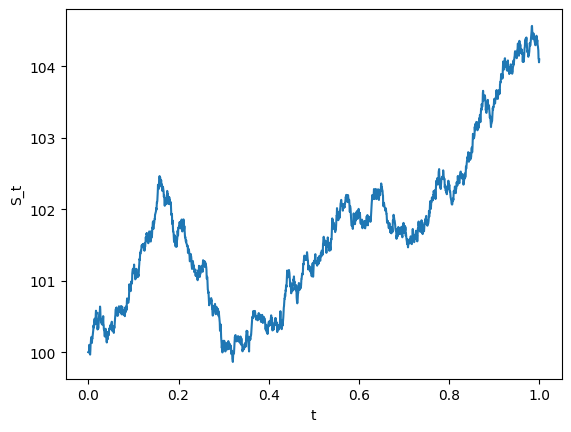

In [3]:
plt.plot(t, S)
plt.xlabel("t")
plt.ylabel("S_t")
plt.show()

0.3713115347356679 0.3713115347356679
0.5011805555662322 0.2751362491736763
0.5011429684341039 0.2751981617946482
0.6761171950744259 0.20400947248406423
0.6759650858184694 0.20408599038245537
0.6758130107832453 0.20416253698043926
0.5009926480927472 0.27544595162896535
0.5009550750531456 0.2755079339408267
0.5009175048314163 0.27556993020028303
0.37156225463005965 0.37156225463005965
0.5008423728407346 0.27569396457451545
0.37161799314854044 0.37161799314854044
0.37164586554322526 0.37164586554322526
0.3716737400284221 0.3716737400284221
0.5006921426645359 0.27594220083219195
0.3717294952709668 0.3717294952709668
0.37175737602862446 0.37175737602862446
0.3717852588774213 0.3717852588774213
0.2761906606030662 0.5005419575506304
0.371841030849048 0.371841030849048
0.3718689199721878 0.3718689199721878
0.2763771522328178 0.5004293482791958
0.2764393440883906 0.5003918174855014
0.2765015499387083 0.5003542895065055
0.27656376978691405 0.5003167643420079
0.5002792419917813 0.276626003636160

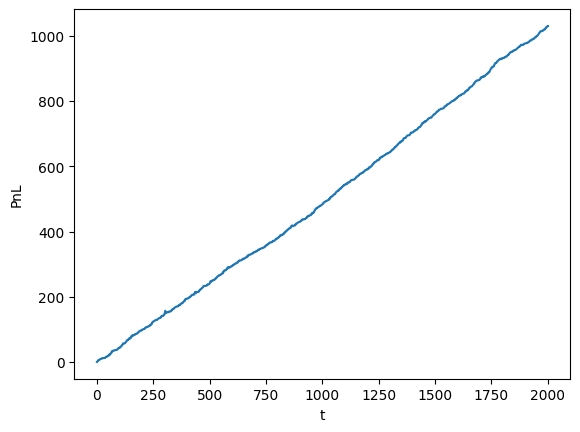

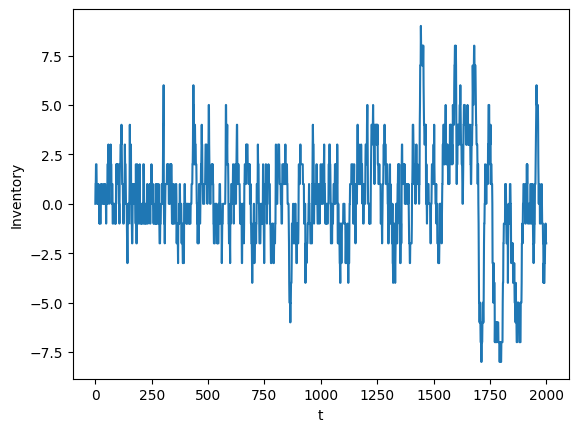

In [4]:
X = np.zeros(len(t)) # wealth
q = np.zeros(len(t)) # inventory
gamma = 0.1 # inventory risk

k = 1.5 # order book liquidity
A = 1400 # order book liquidity
Na = np.zeros(len(t) - 1) # number of stocks sold
Nb = np.zeros(len(t) - 1) # number of stocks bought

r = np.zeros(len(t) - 1) # reservation price
pa = np.zeros(len(t) - 1) # quoted ask price
pb = np.zeros(len(t) - 1) # quoted bid price
delta = np.zeros(len(t) - 1) # optimal spread

for i in range(0, len(t) - 1):
    r[i] = S[i] - q[i] * gamma * sigma**2 * (T - t[i])
    delta[i] = gamma * sigma**2 * (T - t[i]) + 2 / gamma * np.log(1 + gamma / k)
    pa[i] = r[i] + delta[i] / 2
    pb[i] = r[i] - delta[i] / 2
    lambdaa = A * np.exp(-k * (pa[i] - S[i]) / 2) * dt
    lambdab = A * np.exp(-k * (S[i] - pb[i]) / 2) * dt

    print(lambdaa, lambdab)

    Na[i], Nb[i] = np.random.poisson([lambdaa, lambdab])
    q[i+1] = q[i] + Nb[i] - Na[i]
    X[i+1] = X[i] - Nb[i] * pb[i] + Na[i] * pa[i]

pnl = X + q * S

plt.plot(pnl)
plt.xlabel("t")
plt.ylabel("PnL")
plt.show()

plt.plot(q)
plt.xlabel("t")
plt.ylabel("Inventory")
plt.show()



